In [21]:
# Keran Nguyen
# CHE 4230
# Homework 2

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
data = pd.read_excel('/Users/Nguyener/CHE4230/CHE4230-HW-2/Data Plant.xlsx')
print (data)

      39527.250000   27.466360      27.628910      8.822266       \
0      39527.252083      27.471821      27.566410       8.869142   
1      39527.254167      27.477289      27.539061       8.734374   
2      39527.256250      27.482759            NaN       8.734374   
3      39527.258333      27.488220      27.476561       8.756347   
4      39527.260417      27.493690      27.468750       8.756347   
...             ...            ...            ...            ...   
7194   39542.239583      26.626909      27.964840       9.326172   
7195   39542.241667      26.611160      27.906250       9.295410   
7196   39542.243750      26.595421      28.089849       9.326172   
7197   39542.245833      26.579670      27.964840       9.326172   
7198   39542.247917      26.563931      27.884371       9.326172   

      5.396484       1691.651001    7.366691       78.552643      \
0          5.396484    1698.780029       7.370453      78.717918   
1          5.404296    1703.457031       7.3742

In [24]:
data.describe()

,39527.250000,27.466360,27.628910,8.822266,5.396484,1691.651001,7.366691,78.552643,13.514650,36.843750,...,3.066406,55.951462,71.275284,30.659370,30.592581,375845.312500,45.991550,3.265625,2.267400,1.721600
count,7199.000000,7198.000000,7198.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,...,7199.000000,7198.000000,7199.000000,7199.000000,7198.000000,7199.000000,7199.000000,7199.000000,7198.000000,7197.000000
mean,39534.750000,27.127295,27.953209,9.593198,6.395699,1701.915367,11.555007,76.332696,18.356032,37.815861,...,3.620778,52.985809,70.771369,30.648593,30.609367,386035.274322,45.167884,3.841032,2.114043,0.692348
std,4.329826,0.674680,0.698533,0.630545,0.952640,99.738546,2.901431,3.595688,3.648891,1.768092,...,0.623456,1.915064,1.725054,0.192165,0.194832,18811.255389,14.682053,0.619553,0.637675,17.474702
min,39527.252083,24.231501,24.593750,7.673828,4.951172,687.060486,6.780738,18.643391,8.441406,35.882809,...,2.455078,47.744381,0.000000,29.974609,30.035160,236985.406250,12.223560,0.000000,-8.956800,-320.799988
25%,39531.001042,26.652867,27.507811,9.191404,5.640625,1659.447998,9.108021,74.057091,15.921870,37.166019,...,3.158203,51.530783,71.275284,30.534136,30.497549,375581.046875,38.216480,3.388672,1.930599,1.390500
50%,39534.750000,27.109890,27.906250,9.570802,6.177734,1697.920044,11.137910,76.542381,19.292971,37.535160,...,3.511719,53.136414,71.275284,30.603519,30.573830,386836.500000,47.806690,3.737500,2.160500,1.642300
75%,39538.498958,27.518567,28.394529,9.923826,6.958984,1751.557495,13.789635,78.800842,21.316410,37.904301,...,4.030078,54.495871,71.275284,30.724609,30.679689,397080.296875,55.019815,4.246094,2.328500,1.789600
max,39542.247917,47.017712,42.443359,17.277340,19.515141,2235.039062,26.766680,84.796471,29.253910,64.715332,...,15.594240,57.336620,71.275284,31.686710,31.644920,643457.375000,90.493187,14.015130,4.172300,135.899994


In [25]:
data.shape

(7199, 27)

In [26]:
data.isnull().sum().sum()
data_mean = data.fillna(data.mean())
print (data_mean)
data_mean.isnull().sum().sum()
data_drop_dup = data.drop_duplicates()

      39527.250000   27.466360      27.628910      8.822266       \
0      39527.252083      27.471821      27.566410       8.869142   
1      39527.254167      27.477289      27.539061       8.734374   
2      39527.256250      27.482759      27.953209       8.734374   
3      39527.258333      27.488220      27.476561       8.756347   
4      39527.260417      27.493690      27.468750       8.756347   
...             ...            ...            ...            ...   
7194   39542.239583      26.626909      27.964840       9.326172   
7195   39542.241667      26.611160      27.906250       9.295410   
7196   39542.243750      26.595421      28.089849       9.326172   
7197   39542.245833      26.579670      27.964840       9.326172   
7198   39542.247917      26.563931      27.884371       9.326172   

      5.396484       1691.651001    7.366691       78.552643      \
0          5.396484    1698.780029       7.370453      78.717918   
1          5.404296    1703.457031       7.3742

In [27]:
x_train, x_test = train_test_split(data_mean, test_size = 0.15, random_state = 42)
x_train2, x_val = train_test_split(x_train, test_size = 0.1764, random_state = 42)

print(len(x_train))
print(len(x_test))
print(len(x_val))


6119
1080
1080


In [28]:
scaler = StandardScaler().fit(x_train2)
data_scaled = scaler.transform(x_train2)
print (data_scaled)
np.any(np.isnan(data_scaled))

[[ 0.17675863 -1.5125772  -1.16314744 ... -1.42418534 -1.05643226
   0.04888306]
 [ 0.83654912  2.01030682  1.84868833 ...  1.46050397  2.97328861
   0.03654656]
 [ 1.22537148  0.14917962 -1.20384221 ...  1.95439387  0.20414942
   0.0583314 ]
 ...
 [-0.73516263 -0.68471064 -0.31861889 ...  1.85687359  1.10899034
   0.0433612 ]
 [-0.58784485 -0.0157613  -0.15726785 ... -0.90827644 -0.22202222
   0.06798604]
 [ 0.80611954  1.5429921   1.5754054  ... -1.00579633 -1.91992739
   0.03204244]]


False

In [29]:
#cube root transformation for 0 and negative values

def cbrt_transform(x):
    return np.cbrt(x+1)

data_cbrt = cbrt_transform(data_scaled)

print (data_cbrt)
np.any(np.isnan(data_cbrt))

[[ 1.05575334 -0.80030051 -0.54642022 ... -0.7513666  -0.3835681
   1.01603583]
 [ 1.22461859  1.44389935  1.4175824  ...  1.35002359  1.58385968
   1.01203672]
 [ 1.30557204  1.04744036 -0.58852472 ...  1.43490384  1.063882
   1.01907753]
 ...
 [ 0.6421844   0.68061749  0.87996088 ...  1.41893883  1.282404
   1.01424971]
 [ 0.74419528  0.99471839  0.94456066 ...  0.45098314  0.91972021
   1.02216701]
 [ 1.21781737  1.36494453  1.37071932 ... -0.17963229 -0.97256324
   1.01056872]]


False

In [31]:
DPCA = PCA(n_components=10)
data_PCA = DPCA.fit_transform(data_cbrt)
print(data_PCA)

[[ 3.89603297  0.14554407  0.36542512 ...  0.23750468  0.25514656
  -0.64118283]
 [-0.66355022 -0.58166756 -0.37098346 ... -0.35906972 -1.07756326
   0.76502037]
 [-0.8711658   0.93697567  0.98979598 ... -1.47036108 -0.03352671
   2.18184888]
 ...
 [-1.78532136  1.6708207   0.36202458 ...  0.34765862  0.12400507
  -1.45446928]
 [-1.00327322  0.79101949  2.04760796 ...  0.17311413  0.4592305
   0.34673549]
 [ 1.65094317 -0.89642533  4.54440942 ... -1.15609963 -0.09944247
   0.93200088]]


Text(0.5, 1.0, 'Principal Component Analysis (PCA)')

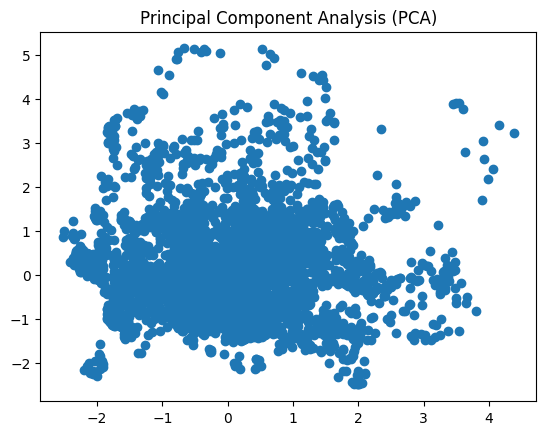

In [33]:
plt.scatter(data_PCA[:,1], data_PCA[:,2])
plt.title("Principal Component Analysis (PCA)")